# Spaceship Titanic

**Goal:** Predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

In [1]:
%reset

Nothing done.


## Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
X = train_data.copy()
y = X.pop("Transported")

data = pd.concat([X, test_data], axis=0).reset_index(drop=True)
display(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [3]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")
print(f"Combined data shape: {data.shape}")

Train shape: (8693, 14)
Test shape: (4277, 13)
Combined data shape: (12970, 13)


In [2]:
"""
Cell generated by Data Wrangler.
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def clean_data(train_data):
    train_data = train_data.drop(columns=['Name'])
    # Replace missing values with the most common value of each column in: 'HomePlanet'
    train_data = train_data.fillna({'HomePlanet': train_data['HomePlanet'].mode()[0]})
    # One-hot encode column: 'HomePlanet'
    insert_loc = train_data.columns.get_loc('HomePlanet')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['HomePlanet']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    # One-hot encode column: 'Destination'
    insert_loc = train_data.columns.get_loc('Destination')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['Destination']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to bool for column: 'CryoSleep'
    train_data = train_data.astype({'CryoSleep': 'bool'})
    # Split text using string '/' in column: 'Cabin'
    loc_0 = train_data.columns.get_loc('Cabin')
    train_data_split = train_data['Cabin'].str.split(pat='/', expand=True).add_prefix('Cabin_')
    train_data = pd.concat([train_data.iloc[:, :loc_0], train_data_split, train_data.iloc[:, loc_0:]], axis=1)
    train_data = train_data.drop(columns=['Cabin'])
    # Rename column 'Cabin_0' to 'Cabin_deck'
    train_data = train_data.rename(columns={'Cabin_0': 'Cabin_deck'})
    # Rename column 'Cabin_1' to 'Cabin_num'
    train_data = train_data.rename(columns={'Cabin_1': 'Cabin_num'})
    # Rename column 'Cabin_2' to 'Cabin_side'
    train_data = train_data.rename(columns={'Cabin_2': 'Cabin_side'})
    # Replace missing values with the most common value of each column in: 'Cabin_deck'
    train_data = train_data.fillna({'Cabin_deck': train_data['Cabin_deck'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'Cabin_num'
    train_data = train_data.fillna({'Cabin_num': train_data['Cabin_num'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'Cabin_side'
    train_data = train_data.fillna({'Cabin_side': train_data['Cabin_side'].mode()[0]})
    # One-hot encode column: 'Cabin_side'
    insert_loc = train_data.columns.get_loc('Cabin_side')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['Cabin_side']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["RoomService"].isna()), "RoomService"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["FoodCourt"].isna()), "FoodCourt"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["ShoppingMall"].isna()), "ShoppingMall"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["Spa"].isna()), "Spa"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["VRDeck"].isna()), "VRDeck"] = 0
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["RoomService"].isna()), "RoomService"] = train_data.loc[train_data["CryoSleep"] == False, "RoomService"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["FoodCourt"].isna()), "FoodCourt"] = train_data.loc[train_data["CryoSleep"] == False, "FoodCourt"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["ShoppingMall"].isna()), "ShoppingMall"] = train_data.loc[train_data["CryoSleep"] == False, "ShoppingMall"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["Spa"].isna()), "Spa"] = train_data.loc[train_data["CryoSleep"] == False, "Spa"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["VRDeck"].isna()), "VRDeck"] = train_data.loc[train_data["CryoSleep"] == False, "VRDeck"].median()
    # Change column type to bool for column: 'VIP'
    train_data = train_data.astype({'VIP': 'bool'})
    # Replace missing values with the median of each column in: 'Age'
    train_data = train_data.fillna({'Age': train_data['Age'].median()})
    std_scaler = StandardScaler()
    train_data["Age"] = std_scaler.fit_transform(train_data[["Age"]])
    features_to_transform = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for i in features_to_transform:
        train_data[i] = np.log1p(train_data[i])
    # Change column type to int64 for column: 'Cabin_num'
    train_data = train_data.astype({'Cabin_num': 'int64'})
    
    return train_data

train_data_clean = clean_data(train_data.copy())
test_data_clean = clean_data(test_data.copy())


In [3]:
def transform_features(data):
    data = data.copy()

    # Ensure numeric spending columns
    spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for col in spend_cols:
        data[col] = pd.to_numeric(data[col], errors="coerce").fillna(0)

    # Ensure CryoSleep numeric
    # data["CryoSleep_int"] = data["CryoSleep"].astype(int)

    # Spending features
    data["TotalSpend"] = data[spend_cols].sum(axis=1)
    data["LuxurySpend"] = data["Spa"] + data["VRDeck"]
    data["EssentialSpend"] = data["FoodCourt"] + data["ShoppingMall"] + data["RoomService"]
    data["LuxuryRatio"] = data["LuxurySpend"] / (data["TotalSpend"] + 1)

    # CryoSleep interactions
    # data["CryoSleep_NoSpend"] = (
    #     (data["CryoSleep_int"] == 1) & (data["TotalSpend"] == 0)
    # ).astype(int)

    # data["CryoSleep_LuxurySpend"] = data["CryoSleep_int"] * data["LuxurySpend"]

    # Passenger group features
    data["PassengerGroup"] = data["PassengerId"].str.split("_").str[0].astype(int)
    data["GroupSize"] = data.groupby("PassengerGroup")["PassengerGroup"].transform("count")
    # data["GroupCryoRate"] = data.groupby("PassengerGroup")["CryoSleep_int"].transform("mean")

    # Cabin features
    deck_map = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "T":8}
    data["CabinDeckLevel"] = data["Cabin_deck"].map(deck_map)

    data["CabinFront"] = (data["Cabin_num"] < data["Cabin_num"].median()).astype(int)

    data["DeckSide_S"] = data["CabinDeckLevel"] * data["Cabin_side_S"].astype(int)
    data["DeckSide_P"] = data["CabinDeckLevel"] * data["Cabin_side_P"].astype(int)

    # Destination interactions
    data["Luxury_TRAPPIST"] = (
        data["LuxurySpend"] * data["Destination_TRAPPIST-1e"].astype(int)
    )

    data["Luxury_PSO_J318"] = (
        data["LuxurySpend"] * data["Destination_PSO J318.5-22"].astype(int)
    )

    # # Age features (scaled age)
    # data["Age_is_young"] = (data["Age"] < -1).astype(int)
    # data["Age_is_old"] = (data["Age"] > 1).astype(int)
    # # data["Age_abs"] = data["Age"].abs()
    # data["Age_CryoSleep"] = data["Age"] * data["CryoSleep_int"]
    # data["Age_TotalSpend"] = data["Age"] * data["TotalSpend"]
    # data["Age_LuxurySpend"] = data["Age"] * data["LuxurySpend"]

    # data["Age_quantile"] = pd.qcut(
    #     data["Age"], q=5, labels=False, duplicates="drop"
    # )
    # data.set_index(data["PassengerId"], append=True, inplace=True)

    # Drop unused columns
    drop_cols = ["Cabin_num", "Cabin_deck", "PassengerId"]
    data.drop(columns=drop_cols, inplace=True)

    return data
train_data_transformed = transform_features(train_data_clean.copy())
test_data_transformed = transform_features(test_data_clean.copy())

In [4]:
def create_output(preds):
    output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Transported': preds})

    output.to_csv('submissions/submission_12.csv', index=False) 
    return output 

In [5]:
from sklearn.model_selection import train_test_split
X = train_data_transformed.copy()
y = X.pop("Transported")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [9]:
data_clean = clean_data(data.copy())
data_clean.head()

,PassengerId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Cabin_deck,Cabin_num,Cabin_side_P,Cabin_side_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,False,True,False,False,B,0,True,False,False,False,True,0.720932,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,True,False,False,False,F,0,False,True,False,False,True,-0.332557,False,4.700480,2.302585,3.258097,6.309918,3.806662
2,0003_01,False,True,False,False,A,0,False,True,False,False,True,2.055350,True,3.784190,8.182280,0.000000,8.812248,3.912023
3,0003_02,False,True,False,False,A,0,False,True,False,False,True,0.299536,False,0.000000,7.157735,5.918894,8.110728,5.267858
4,0004_01,True,False,False,False,F,1,False,True,False,False,True,-0.894417,False,5.717028,4.262680,5.023881,6.338594,1.098612


In [10]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ConfusionMatrixDisplay(
#     confusion_matrix(y_train, y_train_preds)
# ).plot(ax=ax[0], colorbar=False)
# ax[0].set_title("Train Confusion Matrix")

# ConfusionMatrixDisplay(
#     confusion_matrix(y_test, y_test_preds)
# ).plot(ax=ax[1], colorbar=False)
# ax[1].set_title("Test Confusion Matrix")

# plt.tight_layout()
# plt.show()


In [11]:
# from sklearn.dummy import DummyClassifier

# dummy_clf = DummyClassifier()
# dummy_clf.fit(X,y)
# dummy_clf.score(X,y)

In [12]:
# train_preds = dummy_clf.predict(X)
# test_preds = dummy_clf.predict(test_data_transformed)

In [13]:
# from sklearn.ensemble import RandomForestClassifier

# rf_clf = RandomForestClassifier(random_state=42)
# rf_clf.fit(X,y)
# rf_clf.score(X,y)

In [14]:
# test_preds = rf_clf.predict(test_data_clean)

In [15]:
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from sklearn.metrics import accuracy_score
# rf_clf.fit(X_train, y_train)

# y_train_preds = rf_clf.predict(X_train)
# y_test_preds = rf_clf.predict(X_test)

# train_acc = accuracy_score(y_train, y_train_preds)
# test_acc = accuracy_score(y_test, y_test_preds)

# plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
# plt.ylim(0,1)
# plt.ylabel("Accuracy")
# plt.title("Overftting / Underfitting Check")

In [16]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [100, 200,300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2,5],
#     'min_samples_leaf': [1,2],
#     'bootstrap': [True, False]
# }
# rscv = RandomizedSearchCV(rf_clf, param_grid, random_state=42)
# search = rscv.fit(X,y)
# print(search.best_params_)

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# rf_clf_best = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf= 2, max_depth = None, bootstrap = True)

# rf_clf_best.fit(X, y)

# rf_clf_best.score(X, y)
# # from sklearn.model_selection import cross_val_score

# # print(cross_val_score(rf_clf_best, X, y, cv=3))

In [19]:
# from sklearn.metrics import classification_report
# pred = rf_clf_best.predict(test_data_transformed)
# rf_clf_best.score(test_data_transformed,pred)

In [20]:
# create_output(pred)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def compute_mi(X,y,random_state=42):
    # Detect discrete features automatically
    discrete_features = [X[col].dtype in ["int64", "bool"]
    for col in X.columns]

    mi = mutual_info_classif(X,y,discrete_features=discrete_features,random_state=random_state)
    mi_df = pd.DataFrame({"feature": X.columns, "mi_score":mi}).sort_values("mi_score", ascending=False)

    return mi_df


       
# def drop_low_mi_features(X, mi_df, threshold=0.01):
#     keep_features = mi_df.loc[mi_df["mi_score"] >= threshold, "feature"]
#     return X[keep_features].copy()


In [ ]:
# X = train_data_transformed.copy()
# y = X.pop("Transported")
# mi_df = compute_mi(X,y)
# X_new = drop_low_mi_features(X, mi_df, threshold=0.01)

In [24]:
def plot_corr_heatmap(data, figsize=(12,10)):
    corr = data.corr(numeric_only=True)

    plt.figure(figsize=figsize)
    sns.heatmap(corr,cmap="coolwarm",center=0,square=True,linewidths=0.5,cbar_kws={"shrink":0.8})
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

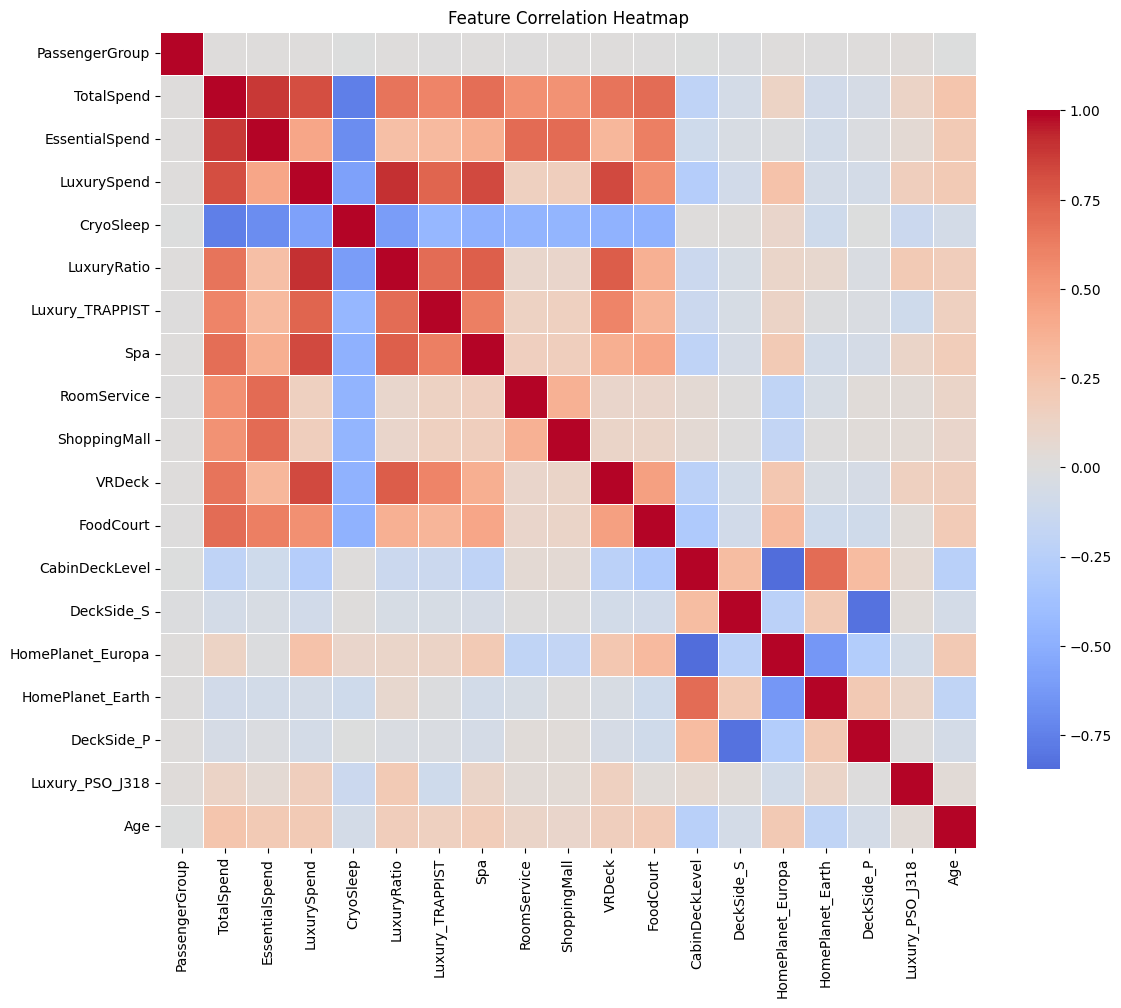

In [ ]:
# plot_corr_heatmap(X_new)

In [26]:
# from sklearn.metrics import accuracy_score

# train_acc = accuracy_score(y_train, y_train_preds)
# test_acc = accuracy_score(y_test, y_test_preds)

# plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
# plt.ylim(0,1)
# plt.ylabel("Accuracy")
# plt.title("Overftting / Underfitting Check")

# plt.show()


In [27]:
# from sklearn.model_selection import RandomizedSearchCV
# rf_clf = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [100, 200,300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2,5],
#     'min_samples_leaf': [1,2],
#     'bootstrap': [True, False]
# }
# rscv = RandomizedSearchCV(rf_clf, param_grid)
# search = rscv.fit(X_train,y_train)
# print(search.best_params_)

In [6]:
from sklearn.ensemble import RandomForestClassifier


rf_clf_best = RandomForestClassifier(n_estimators=100, min_samples_split= 5,min_samples_leaf= 2, max_depth= 10, bootstrap= True, random_state=42)

# rf_clf_best.fit(train_data_transformed,y)
# rf_clf_best.score(train_data_transformed,y)

In [29]:
# y_train_preds = rf_clf_best.predict(X_train)
# y_test_preds = rf_clf_best.predict(X_test)

# train_acc = accuracy_score(y_train, y_train_preds)
# test_acc = accuracy_score(y_test, y_test_preds)

# plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
# plt.ylim(0,1)
# plt.ylabel("Accuracy")
# plt.title("Overftting / Underfitting Check")

# plt.show()

In [6]:
def get_rf_feature_importance(X,y,rf):
    rf.fit(X,y)
    importances = rf.feature_importances_

    importance_df = (
        pd.DataFrame({
            "feature": X.columns,
            "importance": importances
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    
    )

    return rf, importance_df

In [51]:
rf, importance_df = get_rf_feature_importance(train_data_transformed,y,rf_clf_best)

In [7]:
import matplotlib.pyplot as plt

def plot_rf_importance(importance_df, top_n=20, figsize=(10, 6)):
    df_plot = importance_df.head(top_n)

    plt.figure(figsize=figsize)
    plt.barh(df_plot["feature"], df_plot["importance"])
    plt.gca().invert_yaxis()
    plt.title("Random Forest Feature Importance")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


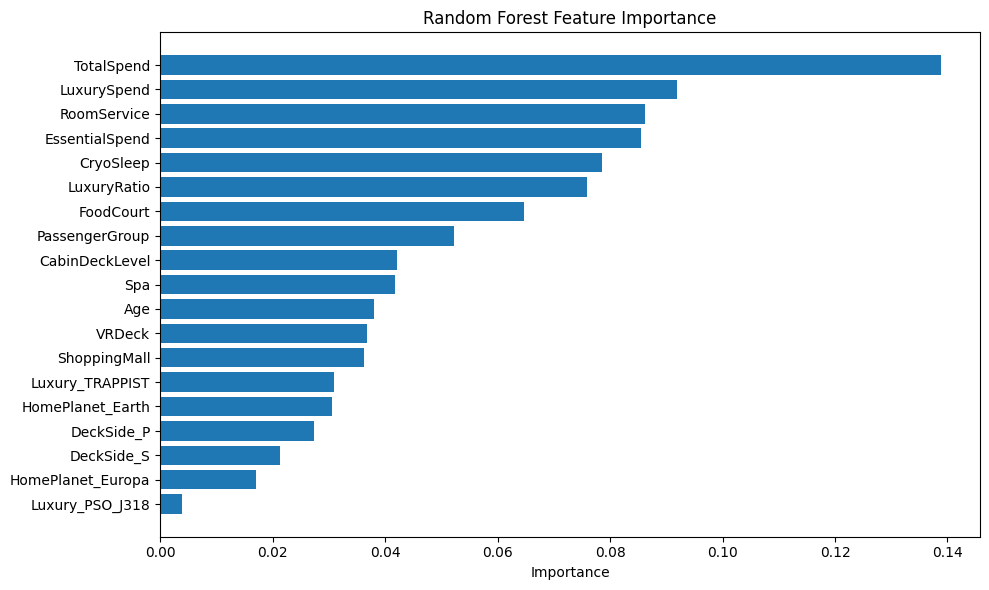

In [33]:
plot_rf_importance(importance_df, top_n=20)


In [34]:
from sklearn.inspection import permutation_importance

def get_permutation_importance(model, X, y, n_repeats=10, random_state=42):
    result = permutation_importance(
        model,
        X,
        y,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )

    perm_df = (
        pd.DataFrame({
            "feature": X.columns,
            "importance": result.importances_mean
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    )

    return perm_df


In [35]:
# perm_importance_df = get_permutation_importance(
#     rf_clf_best, X, y
# )


In [36]:
# perm_importance_df

## Iteration 2

In [8]:
def tree_based_transform(data):
    spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    
    for col in spend_cols:
        data[f"{col}_zero"] = (data[col] == 0).astype(int)
        data[f"{col}_low"] = ((data[col] > 0) & (data[col] <= 1)).astype(int)
        data[f"{col}_high"] = (data[col] > 1).astype(int)

    data["NoSpend"] = (data["TotalSpend"] == 0).astype(int)
    data["LowSpend"] = ((data["TotalSpend"] > 0) & (data["TotalSpend"] <= 3)).astype(int)
    data["HighSpend"] = (data["TotalSpend"] > 3).astype(int)

    data["Cryo_NoSpend"] = (
        (data["CryoSleep"] == True) & (data["TotalSpend"] == 0)
    ).astype(int)
    data["Cryo_Spend"] = (
        (data["CryoSleep"] == True) & (data["TotalSpend"] > 0)
    ).astype(int)

  
    data["UpperDeck"] = data["CabinDeckLevel"].isin([1,2,3]).astype(int)
    data["LowerDeck"] = data["CabinDeckLevel"].isin([6,7]).astype(int)

    data["SoloTraveler"] = (data["GroupSize"] == 1).astype(int)

    data["VIP_Luxury"] = (
        (data["VIP"] == 1) & (data["LuxurySpend"] > 1)
    ).astype(int)

    data.drop(columns=spend_cols, inplace=True)

    return data


In [9]:
X = tree_based_transform(X)

In [10]:
X_train = tree_based_transform(X_train)
X_test = tree_based_transform(X_test)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
}
rscv = RandomizedSearchCV(rf_clf, param_grid)
search = rscv.fit(X_train,y_train)
print(search.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [ ]:
X = drop_low_vars(X, importance_df, 0.04)

In [11]:
rf, importance_df = get_rf_feature_importance(X,y,rf_clf_best)

NameError: name 'rf_clf_best' is not defined

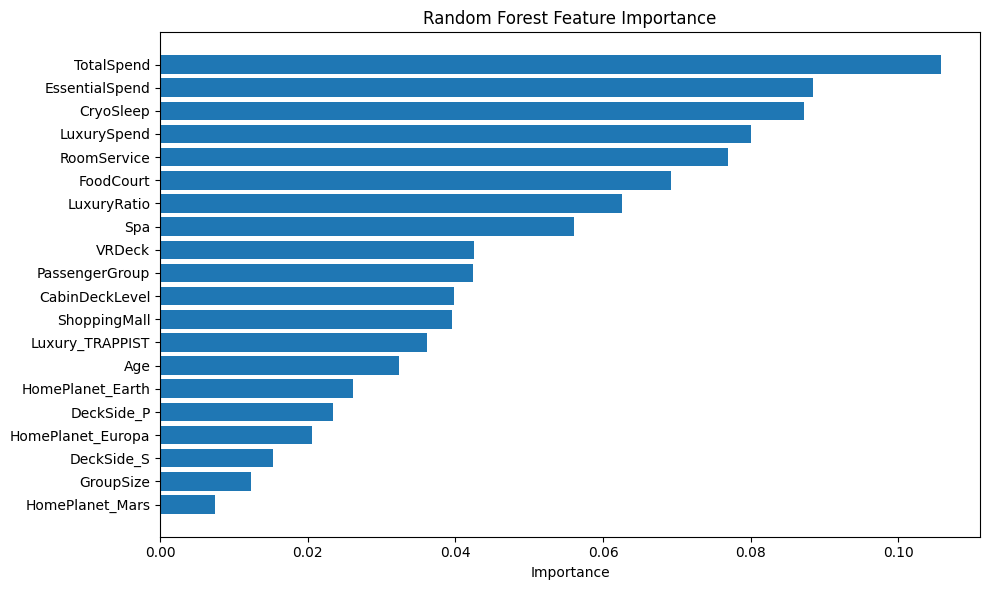

In [43]:
plot_rf_importance(importance_df, top_n=20)


In [17]:
rf_clf_best = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_depth =None, bootstrap= True)
rf_clf_best.fit(X,y)
rf_clf_best.score(X,y)

0.9391464396640975

In [18]:
rf_clf_best.fit(X_train, y_train)
rf_clf_best.score(X_train, y_train)

0.9404659188955996

In [21]:
from sklearn.metrics import classification_report
y_pred = rf_clf_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.75      0.80      0.77       861
        True       0.79      0.73      0.76       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [23]:
rf_clf_1 = RandomForestClassifier(n_estimators=100, min_samples_split= 5,min_samples_leaf= 2, max_depth= 10, bootstrap= True, random_state=42)
rf_clf_1.fit(X_train, y_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.75      0.80      0.77       861
        True       0.79      0.73      0.76       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



Text(0.5, 1.0, 'Overftting / Underfitting Check')

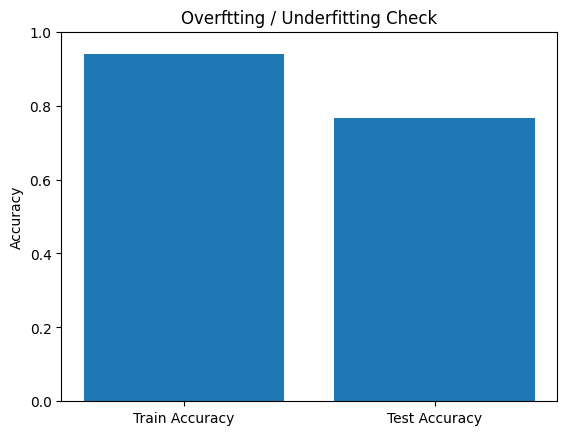

In [19]:
from sklearn.metrics import accuracy_score
y_train_preds = rf_clf_best.predict(X_train)
y_test_preds = rf_clf_best.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")

In [16]:
rf, importance_df = get_rf_feature_importance(X,y,rf_clf_best)

NameError: name 'rf_clf_best' is not defined

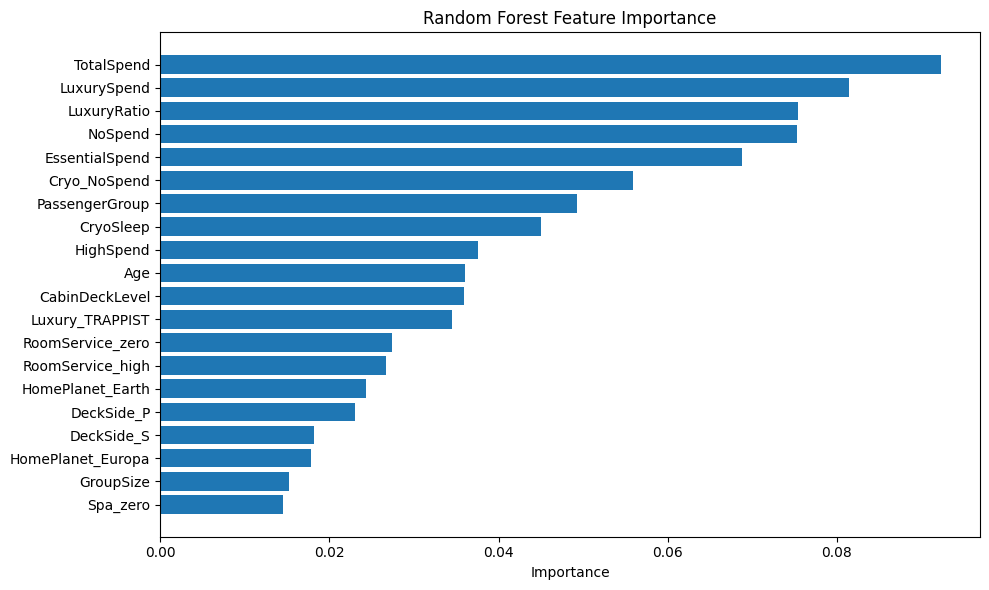

In [18]:
plot_rf_importance(importance_df, top_n=20)


In [19]:
importance_df

,feature,importance
0,TotalSpend,0.092315
1,LuxurySpend,0.081424
2,LuxuryRatio,0.075413
3,NoSpend,0.075298
4,EssentialSpend,0.068823
5,Cryo_NoSpend,0.055855
6,PassengerGroup,0.049237
7,CryoSleep,0.044969
8,HighSpend,0.037630
9,Age,0.036034


In [14]:

def drop_low_vars(data, importance_df, threshold):
    for _, row in importance_df.iterrows():
        if row["importance"]  < threshold:
            data.drop(columns=row["feature"], inplace=True)
    return data.copy()



In [15]:
X = drop_low_vars(X, importance_df, 0.04)

NameError: name 'importance_df' is not defined

In [ ]:
X_train = drop_low_vars(X_train,importance_df,0.04)
X_test = drop_low_vars(X_test,importance_df,0.04)

In [20]:
X.shape

(8693, 12)

In [21]:
test_data_transformed = tree_based_transform(test_data_transformed)


In [22]:
test_data_transformed = drop_low_vars(test_data_transformed,importance_df,0.03)

In [23]:
rf_clf_best.fit(X,y)
rf_clf_best.score(X,y)

0.8147935120211665

Text(0.5, 1.0, 'Overftting / Underfitting Check')

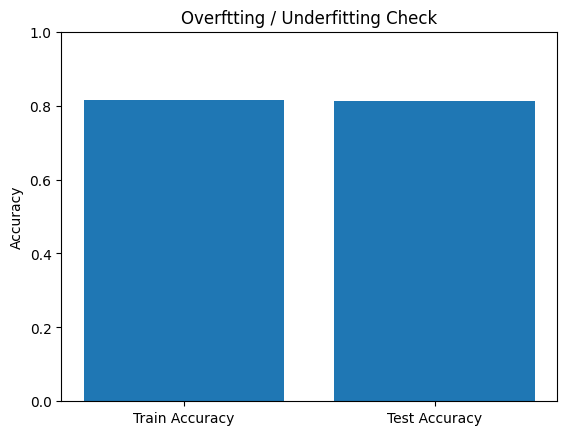

In [24]:
from sklearn.metrics import accuracy_score
y_train_preds = rf_clf_best.predict(X_train)
y_test_preds = rf_clf_best.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")

In [25]:
pred = rf_clf_best.predict(test_data_transformed)
create_output(pred)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
